In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Reshape,LSTM
from keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt

In [119]:
data = pd.read_excel('Option_Data_Final (1).xlsx')

# Data Preprocessing

In [120]:
data.columns = data.iloc[4] #
data = data[5:]

In [121]:
data.reset_index(inplace=True)

In [122]:
final_data= data.drop(columns='index')
final_data.columns = ['SPOT PRICE', 'STRIKE PRICE', 'BID PRICE', 'ASK PRICE', 'LTP','VOLUME TRADED']

In [123]:
final_data.replace('-',np.nan,inplace= True)

In [124]:
# In this case since Volume traded isn't available,we are dropping the column
# If Volume traded is available, remove this code
final_data.drop(columns='VOLUME TRADED', inplace=True)

In [125]:
final_data.shape 
#Shows us shape where (x,y) implies X number of examples and Y number of attributes for this following data

(94, 5)

In [126]:
final_data['Option Price'] = final_data['LTP'].fillna((final_data['BID PRICE'] + final_data['ASK PRICE'])/2)
#if LTP is available use that, otherwise take option price as average of BID and ASK price

In [127]:
scaler = MinMaxScaler()
scaler.fit(final_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [128]:
final_data = pd.DataFrame(scaler.transform(final_data),columns=final_data.columns)

In [291]:
x_var = final_data[['SPOT PRICE', 'STRIKE PRICE','BID PRICE','ASK PRICE']] #Our X variable
y_var = final_data[['Option Price']] # Our Y variable or the variable we are trying to predict

In [292]:
print(x_var.shape)
print(y_var.shape)

(94, 4)
(94, 1)


## Vanilla Neural Network

In [154]:
model = Sequential()

In [155]:
model.add(Dense(8,input_dim = x_var.shape[1],activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

In [156]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [157]:
history = model.fit(x_var,y_var, epochs=100, batch_size=8)

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3220 - acc: 0.0106
Epoch 2/100
94/94 [==============================] - 0s 247us/step - loss: 0.2898 - acc: 0.0106
Epoch 3/100
94/94 [==============================] - 0s 226us/step - loss: 0.2620 - acc: 0.0106
Epoch 4/100
94/94 [==============================] - 0s 268us/step - loss: 0.2362 - acc: 0.0106
Epoch 5/100
94/94 [==============================] - 0s 252us/step - loss: 0.2154 - acc: 0.0106
Epoch 6/100
94/94 [==============================] - 0s 242us/step - loss: 0.1962 - acc: 0.0106
Epoch 7/100
94/94 [==============================] - 0s 241us/step - loss: 0.1793 - acc: 0.0106
Epoch 8/100
94/94 [==============================] - 0s 237us/step - loss: 0.1681 - acc: 0.0106
Epoch 9/100
94/94 [==============================] - 0s 247us/step - loss: 0.1572 - acc: 0.0106
Epoch 10/100
94/94 [==============================] - 0s 225us/step - loss: 0.1416 - acc: 0.0106
Epoch 11/100
94/94 [=====================

94/94 [==============================] - 0s 255us/step - loss: 1.4364e-04 - acc: 0.0213
Epoch 84/100
94/94 [==============================] - 0s 225us/step - loss: 1.4629e-04 - acc: 0.0213
Epoch 85/100
94/94 [==============================] - 0s 256us/step - loss: 1.3856e-04 - acc: 0.0213
Epoch 86/100
94/94 [==============================] - 0s 266us/step - loss: 1.4069e-04 - acc: 0.0213
Epoch 87/100
94/94 [==============================] - 0s 250us/step - loss: 1.3397e-04 - acc: 0.0213
Epoch 88/100
94/94 [==============================] - 0s 272us/step - loss: 1.3088e-04 - acc: 0.0213
Epoch 89/100
94/94 [==============================] - 0s 256us/step - loss: 1.3186e-04 - acc: 0.0213
Epoch 90/100
94/94 [==============================] - 0s 261us/step - loss: 1.2161e-04 - acc: 0.0213
Epoch 91/100
94/94 [==============================] - 0s 252us/step - loss: 1.1911e-04 - acc: 0.0213
Epoch 92/100
94/94 [==============================] - 0s 229us/step - loss: 1.1968e-04 - acc: 0.0213
Epo

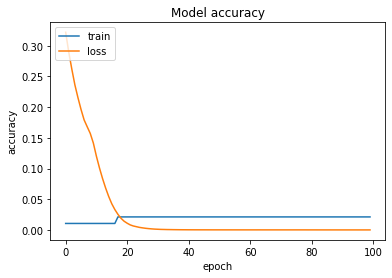

In [165]:
# Plot model loss and accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

## LSTM based Neural Network 

In [321]:
model = Sequential()

In [322]:
model.add(LSTM(8,input_shape = (4,1) ,activation='relu', return_sequences=False))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.add(Dense(1))

In [323]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 3         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [324]:
x_var = final_data[['SPOT PRICE', 'STRIKE PRICE','BID PRICE','ASK PRICE']] #Our X variable
y_var = final_data[['Option Price']] # Our Y variable or the variable we are trying to predict
x_var = np.reshape(x_var.values, newshape= (x_var.shape[0],x_var.shape[1],1))
y_var = np.reshape(y_var.values, newshape= (y_var.shape[0],y_var.shape[1]))
history = model.fit(x_var,y_var, epochs=400)

Epoch 1/400
94/94 [==============================] - 2s 20ms/step - loss: 0.8943 - acc: 0.0000e+00
Epoch 2/400
94/94 [==============================] - 0s 251us/step - loss: 0.8720 - acc: 0.0000e+00
Epoch 3/400
94/94 [==============================] - 0s 280us/step - loss: 0.8497 - acc: 0.0000e+00
Epoch 4/400
94/94 [==============================] - 0s 229us/step - loss: 0.8270 - acc: 0.0000e+00
Epoch 5/400
94/94 [==============================] - 0s 281us/step - loss: 0.8050 - acc: 0.0000e+00
Epoch 6/400
94/94 [==============================] - 0s 270us/step - loss: 0.7823 - acc: 0.0106
Epoch 7/400
94/94 [==============================] - 0s 236us/step - loss: 0.7605 - acc: 0.0106
Epoch 8/400
94/94 [==============================] - 0s 249us/step - loss: 0.7388 - acc: 0.0106
Epoch 9/400
94/94 [==============================] - 0s 255us/step - loss: 0.7169 - acc: 0.0106
Epoch 10/400
94/94 [==============================] - 0s 266us/step - loss: 0.6962 - acc: 0.0106
Epoch 11/400
94/94 [

94/94 [==============================] - 0s 237us/step - loss: 0.0927 - acc: 0.0106
Epoch 86/400
94/94 [==============================] - 0s 243us/step - loss: 0.0926 - acc: 0.0106
Epoch 87/400
94/94 [==============================] - 0s 237us/step - loss: 0.0924 - acc: 0.0106
Epoch 88/400
94/94 [==============================] - 0s 212us/step - loss: 0.0922 - acc: 0.0106
Epoch 89/400
94/94 [==============================] - 0s 221us/step - loss: 0.0921 - acc: 0.0106
Epoch 90/400
94/94 [==============================] - 0s 237us/step - loss: 0.0919 - acc: 0.0106
Epoch 91/400
94/94 [==============================] - 0s 217us/step - loss: 0.0917 - acc: 0.0106
Epoch 92/400
94/94 [==============================] - 0s 227us/step - loss: 0.0916 - acc: 0.0106
Epoch 93/400
94/94 [==============================] - 0s 266us/step - loss: 0.0914 - acc: 0.0106
Epoch 94/400
94/94 [==============================] - 0s 261us/step - loss: 0.0912 - acc: 0.0106
Epoch 95/400
94/94 [=======================

94/94 [==============================] - 0s 230us/step - loss: 0.0754 - acc: 0.0106
Epoch 169/400
94/94 [==============================] - 0s 250us/step - loss: 0.0751 - acc: 0.0106
Epoch 170/400
94/94 [==============================] - 0s 212us/step - loss: 0.0748 - acc: 0.0106
Epoch 171/400
94/94 [==============================] - 0s 230us/step - loss: 0.0745 - acc: 0.0106
Epoch 172/400
94/94 [==============================] - 0s 246us/step - loss: 0.0743 - acc: 0.0106
Epoch 173/400
94/94 [==============================] - 0s 282us/step - loss: 0.0740 - acc: 0.0106
Epoch 174/400
94/94 [==============================] - 0s 232us/step - loss: 0.0737 - acc: 0.0106
Epoch 175/400
94/94 [==============================] - 0s 238us/step - loss: 0.0734 - acc: 0.0106
Epoch 176/400
94/94 [==============================] - 0s 241us/step - loss: 0.0731 - acc: 0.0106
Epoch 177/400
94/94 [==============================] - 0s 238us/step - loss: 0.0728 - acc: 0.0106
Epoch 178/400
94/94 [=============

94/94 [==============================] - 0s 307us/step - loss: 0.0425 - acc: 0.0213
Epoch 252/400
94/94 [==============================] - 0s 293us/step - loss: 0.0419 - acc: 0.0213
Epoch 253/400
94/94 [==============================] - 0s 279us/step - loss: 0.0413 - acc: 0.0213
Epoch 254/400
94/94 [==============================] - 0s 286us/step - loss: 0.0408 - acc: 0.0213
Epoch 255/400
94/94 [==============================] - 0s 292us/step - loss: 0.0402 - acc: 0.0213
Epoch 256/400
94/94 [==============================] - 0s 258us/step - loss: 0.0397 - acc: 0.0213
Epoch 257/400
94/94 [==============================] - 0s 255us/step - loss: 0.0391 - acc: 0.0213
Epoch 258/400
94/94 [==============================] - 0s 254us/step - loss: 0.0385 - acc: 0.0213
Epoch 259/400
94/94 [==============================] - 0s 238us/step - loss: 0.0380 - acc: 0.0213
Epoch 260/400
94/94 [==============================] - 0s 237us/step - loss: 0.0374 - acc: 0.0213
Epoch 261/400
94/94 [=============

94/94 [==============================] - 0s 236us/step - loss: 0.0121 - acc: 0.0213
Epoch 335/400
94/94 [==============================] - 0s 289us/step - loss: 0.0119 - acc: 0.0213
Epoch 336/400
94/94 [==============================] - 0s 293us/step - loss: 0.0117 - acc: 0.0213
Epoch 337/400
94/94 [==============================] - 0s 265us/step - loss: 0.0116 - acc: 0.0213
Epoch 338/400
94/94 [==============================] - 0s 279us/step - loss: 0.0114 - acc: 0.0213
Epoch 339/400
94/94 [==============================] - 0s 298us/step - loss: 0.0112 - acc: 0.0213
Epoch 340/400
94/94 [==============================] - 0s 239us/step - loss: 0.0111 - acc: 0.0213
Epoch 341/400
94/94 [==============================] - 0s 281us/step - loss: 0.0109 - acc: 0.0213
Epoch 342/400
94/94 [==============================] - 0s 241us/step - loss: 0.0107 - acc: 0.0213
Epoch 343/400
94/94 [==============================] - 0s 261us/step - loss: 0.0106 - acc: 0.0213
Epoch 344/400
94/94 [=============

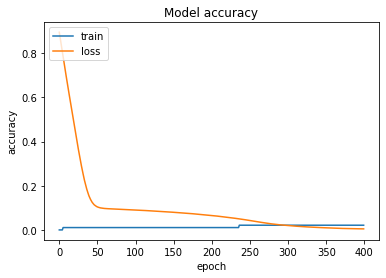

In [325]:
# Plot model loss and accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()